In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os, sys

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Load the dataset

In [13]:
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../Scripts'))
sys.path.append(scripts_path)

In [14]:
from path import PATH_PROCESSED_CSV

In [15]:
data = pd.read_csv(PATH_PROCESSED_CSV) 

In [16]:
data

,Etat,Milieage,Carburant,CarVendeur,Portes,seats,fillcareName,Price,etatCategory,Month,...,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2
0,Très bon prix,250000,Diesel,Professionnel,5.0,5.0,FIAT-FIORINO,1450,3,3.0,...,55,Boîte manuelle,1248.0,5,1090.0,75,Euro 4,Diesel,4.5,123.0
1,Bon prix,27500,Electrique,Professionnel,5.0,4.0,AUDI-E-TRON GT,599501,2,9.0,...,350,Boîte automatique,NaN,3,2254.0,476,NaN,Électrique,NaN,0.0
2,Très bon prix,73409,Essence,Professionnel,5.0,3.0,VOLKSWAGEN-GOLF,4000,3,2.0,...,55,Boîte manuelle,1390.0,5,1154.0,75,Euro 4,Essence,6.8,166.0
3,Très bon prix,142000,Diesel,Professionnel,5.0,5.0,CITROEN-C4 CACTUS,6450,3,7.0,...,73,Boîte manuelle,1560.0,7,1145.0,99,Euro 6b,Diesel,3.4,90.0
4,Très bon prix,22700,Electrique,Professionnel,5.0,5.0,AUDI-Q8 E-TRON,689501,3,9.0,...,300,Boîte automatique,NaN,3,2585.0,408,NaN,Électrique,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Pas d'information,31820,Essence,Professionnel,5.0,5.0,MERCEDES-BENZ-GLB 180,282901,0,11.0,...,100,Boîte automatique,1332.0,1,NaN,136,Euro 6d,Essence,NaN,159.0
393,Pas d'information,118226,Essence,Professionnel,5.0,5.0,AUDI-RS6,79999,0,9.0,...,441,Boîte automatique,3996.0,4,2150.0,600,Euro 6d,Essence,11.5,263.0
394,Très bon prix,86802,Diesel,Professionnel,5.0,NaN,OPEL-INSIGNIA,169501,3,8.0,...,90,Boîte automatique,1496.0,9,NaN,122,Euro 6,Diesel,4.1,109.0
395,Bon prix,50163,Diesel,Professionnel,5.0,5.0,RENAULT-MEGANE,17900,2,4.0,...,85,Boîte automatique,1461.0,8,1422.0,116,Euro 6,Diesel,3.9,104.0


## 1 -  Copy les donnes

In [19]:
data2 = data.copy()

In [85]:
data2.drop("Price", axis=1, inplace=True)

## 2 - feature engineering

In [87]:
data2.describe(include = "all")

,Etat,Milieage,Carburant,CarVendeur,Portes,seats,fillcareName,etatCategory,Month,Year,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2
count,397,397.000000,397,397,386.000000,392.000000,397,397.000000,395.000000,395.000000,397.000000,391,382.000000,397.000000,321.000000,397.000000,363,362,280.000000,352.000000
unique,4,NaN,7,1,NaN,NaN,198,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,7,3,NaN,NaN
top,Très bon prix,NaN,Essence,Professionnel,NaN,NaN,AUDI-A3,NaN,NaN,NaN,NaN,Boîte manuelle,NaN,NaN,NaN,NaN,Euro 6d,Essence,NaN,NaN
freq,142,NaN,201,397,NaN,NaN,15,NaN,NaN,NaN,NaN,232,NaN,NaN,NaN,NaN,118,178,NaN,NaN
mean,NaN,95189.483627,NaN,NaN,4.880829,4.609694,NaN,1.929471,5.544304,2017.367089,114.899244,NaN,1680.882199,4.513854,1588.934579,156.337531,NaN,NaN,5.158571,120.446023
std,NaN,60369.331373,NaN,NaN,0.573253,0.782290,NaN,1.000032,3.522219,4.274755,75.207994,NaN,589.431653,3.170721,577.704103,102.238861,NaN,NaN,1.586095,44.623687
min,NaN,0.000000,NaN,NaN,2.000000,2.000000,NaN,0.000000,1.000000,2003.000000,33.000000,NaN,990.000000,1.000000,1010.000000,45.000000,NaN,NaN,1.200000,0.000000
25%,NaN,49452.000000,NaN,NaN,5.000000,5.000000,NaN,1.000000,2.000000,2015.000000,80.000000,NaN,1332.000000,1.000000,1300.000000,109.000000,NaN,NaN,4.200000,104.000000
50%,NaN,88223.000000,NaN,NaN,5.000000,5.000000,NaN,2.000000,5.000000,2018.000000,96.000000,NaN,1591.000000,5.000000,1485.000000,131.000000,NaN,NaN,5.100000,119.000000
75%,NaN,131929.000000,NaN,NaN,5.000000,5.000000,NaN,3.000000,9.000000,2020.000000,118.000000,NaN,1992.500000,8.000000,1695.000000,160.000000,NaN,NaN,5.900000,139.000000


<Axes: >

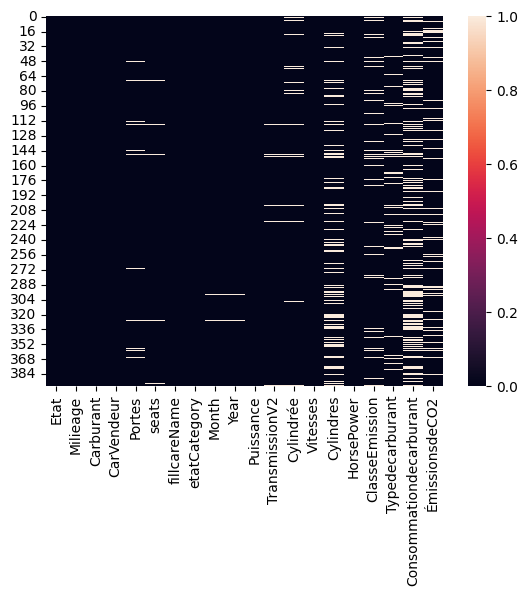

In [88]:
sns.heatmap(data2.isna())

In [89]:
(data2.isna().sum() / data2.shape[0]) * 100

Etat                        0.000000
Milieage                    0.000000
Carburant                   0.000000
CarVendeur                  0.000000
Portes                      2.770781
seats                       1.259446
fillcareName                0.000000
etatCategory                0.000000
Month                       0.503778
Year                        0.503778
Puissance                   0.000000
TransmissionV2              1.511335
Cylindrée                   3.778338
Vitesses                    0.000000
Cylindres                  19.143577
HorsePower                  0.000000
ClasseEmission              8.564232
Typedecarburant             8.816121
Consommationdecarburant    29.471033
ÉmissionsdeCO2             11.335013
dtype: float64

* Consommationdecarburant and Cylindres have mny nan values

In [90]:
categorie_columns = data2.select_dtypes(exclude = np.number).columns
number_columns    = data2.select_dtypes(include = np.number).columns

In [91]:
categorie_columns

Index(['Etat', 'Carburant', 'CarVendeur', 'fillcareName', 'TransmissionV2',
       'ClasseEmission', 'Typedecarburant'],
      dtype='object')

In [92]:
number_columns

Index(['Milieage', 'Portes', 'seats', 'etatCategory', 'Month', 'Year',
       'Puissance', 'Cylindrée', 'Vitesses', 'Cylindres', 'HorsePower',
       'Consommationdecarburant', 'ÉmissionsdeCO2'],
      dtype='object')

#### check nan values for numbers  and categorical column

In [93]:
numbers_nans = list(number_columns[data2.select_dtypes(include = np.number).isna().sum() != 0])
categor_nans = list(categorie_columns[data2.select_dtypes(exclude = np.number).isna().sum() != 0])

In [94]:
numbers_nans

['Portes',
 'seats',
 'Month',
 'Year',
 'Cylindrée',
 'Cylindres',
 'Consommationdecarburant',
 'ÉmissionsdeCO2']

In [95]:
categor_nans

['TransmissionV2', 'ClasseEmission', 'Typedecarburant']

#### Function to Handle Nan Values Categories

In [73]:
def fill_missing_categorical(df, columns, strategy="mode", fill_value="missing"):
    df_filled = df.copy()
    for col in columns:
        if strategy == "mode":
            most_frequent = df_filled[col].mode()[0] 
            df_filled[col] = df_filled[col].fillna(most_frequent)
        elif strategy == "constant":
            df_filled[col] = df_filled[col].fillna(fill_value)
        else:
            raise ValueError("Stratégie non reconnue. Utilisez 'mode' ou 'constant'.")
    return df_filled

#### Function to Handle Nan Values Numerical

In [77]:
def fill_missing_numerical(df, columns, strategy="mean", fill_value=0):
    df_filled = df.copy()
    for col in columns:
        if strategy == "mean":
            df_filled[col] = df_filled[col].fillna(df_filled[col].mean())  
        elif strategy == "median":
            df_filled[col] = df_filled[col].fillna(df_filled[col].median())  
        elif strategy == "constant":
            df_filled[col] = df_filled[col].fillna(fill_value) 
        else:
            raise ValueError("Stratégie non reconnue. Utilisez 'mean', 'median' ou 'constant'.")
    return df_filled

#### Function to transform categrocail data into numbers

In [72]:
def transform_columns(df, transformer, columns):
    df_transformed = df.copy()
    for col in columns:
        if isinstance(transformer, OneHotEncoder):
            enc = OneHotEncoder(drop='first', sparse_output=False)
            transformed = enc.fit_transform(df_transformed[[col]])
            encoded_df = pd.DataFrame(transformed, columns=enc.get_feature_names_out([col]))
            df_transformed = df_transformed.drop(columns=[col]).join(encoded_df)
        elif isinstance(transformer, LabelEncoder):
            enc = LabelEncoder()
            df_transformed[col] = enc.fit_transform(df_transformed[col])
    return df_transformed

#### Function for normalisation

In [99]:
def normalize_numerical(df, columns, method="standard"):
    df_normalized = df.copy()
    if method == "standard":
        scaler = StandardScaler()  
    elif method == "minmax":
        scaler = MinMaxScaler()  
    elif method == "robust":
        scaler = RobustScaler()  
    else:
        raise ValueError("Méthode non reconnue. Utilisez 'standard', 'minmax' ou 'robust'.")
 
    df_normalized[columns] = scaler.fit_transform(df_normalized[columns])
    return df_normalized

In [100]:
df = fill_missing_numerical(data2, numbers_nans)
df = fill_missing_categorical(df, categor_nans)

In [101]:
df.isna().sum()

Etat                       0
Milieage                   0
Carburant                  0
CarVendeur                 0
Portes                     0
seats                      0
fillcareName               0
etatCategory               0
Month                      0
Year                       0
Puissance                  0
TransmissionV2             0
Cylindrée                  0
Vitesses                   0
Cylindres                  0
HorsePower                 0
ClasseEmission             0
Typedecarburant            0
Consommationdecarburant    0
ÉmissionsdeCO2             0
dtype: int64

In [103]:
df = transform_columns(df, LabelEncoder(), categorie_columns)

In [105]:
df = normalize_numerical(df, number_columns)

In [106]:
df.head()

,Etat,Milieage,Carburant,CarVendeur,Portes,seats,fillcareName,etatCategory,Month,Year,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2
0,3,2.567626,1,0,0.211101,0.502741,58,1.071846,-0.725103,-1.729943,-0.797453,1,-0.749668,0.153517,-0.961963,-0.796568,0,0,-4.952984e-01,0.060869
1,0,-1.122671,2,0,0.211101,-0.785328,10,0.070616,0.984841,0.853082,3.129952,0,0.000000,-0.478050,1.282269,3.130569,5,2,6.679812e-16,-2.870574
2,3,-0.361242,5,0,0.211101,-2.073397,176,1.071846,-1.010094,-2.669225,-0.797453,1,-0.503752,0.153517,-0.838569,-0.796568,0,1,1.234485e+00,1.085682
3,3,0.776381,1,0,0.211101,0.502741,42,1.071846,0.414860,-0.555841,-0.557815,1,-0.209345,0.785084,-0.855921,-0.561527,3,0,-1.322586e+00,-0.725616
4,3,-1.202282,2,0,0.211101,0.502741,15,1.071846,0.984841,1.322723,2.464290,0,0.000000,-0.478050,1.920449,2.464621,5,2,6.679812e-16,-2.870574


In [107]:
X = df
Y = data["Price"]

#### Split data

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=11)

#### Forst Model

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [149]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 12117632303.841053
R^2 Score: -2.0799447123450316


#### RandomForestRegressor

In [154]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=14)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R^2 Score:", r2_rf)

Random Forest - Mean Squared Error: 9862823972.0434
Random Forest - R^2 Score: -1.506838941783701


#### XGBoost 

import xgboost as xgb

In [156]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost - Mean Squared Error:", mse_xgb)
print("XGBoost - R^2 Score:", r2_xgb)

NameError: name 'xgb' is not defined